In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path ="C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv" # Path to your uploaded file
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Hosted
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,Men,100M Freestyle,Gold,False
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,Men,100M Freestyle,Silver,False
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,Men,100M Freestyle For Sailors,Bronze,True
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,Men,100M Freestyle For Sailors,Gold,True
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,Men,100M Freestyle For Sailors,Silver,True


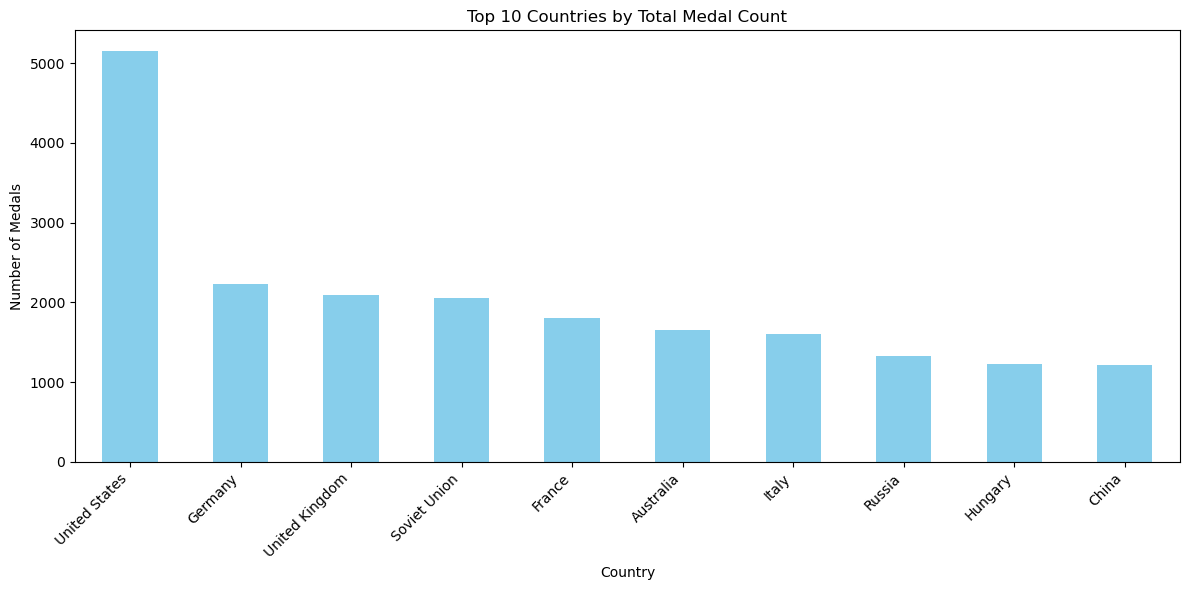

Country
United States     5152
Germany           2236
United Kingdom    2094
Soviet Union      2049
France            1806
Australia         1649
Italy             1608
Russia            1323
Hungary           1233
China             1211
Name: count, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

medal_counts = df['Country'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
medal_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(medal_counts)

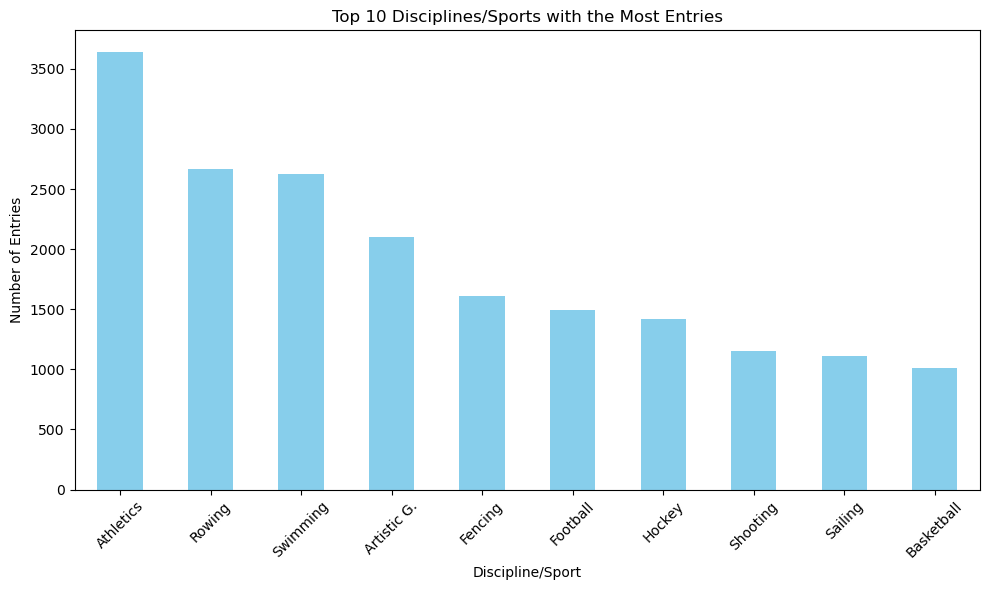

Top 10 disciplines/sports with the most entries:
Discipline
Athletics      3638
Rowing         2667
Swimming       2628
Artistic G.    2103
Fencing        1613
Football       1497
Hockey         1422
Shooting       1150
Sailing        1109
Basketball     1012
dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Step 1: Group by discipline/sport and count the entries
discipline_counts = df.groupby('Discipline').size().sort_values(ascending=False)

# Step 2: Plot the top 10 disciplines/sports with the most entries
top_disciplines = discipline_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_disciplines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Disciplines/Sports with the Most Entries')
plt.ylabel('Number of Entries')
plt.xlabel('Discipline/Sport')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the top 10 disciplines with the most entries
print("Top 10 disciplines/sports with the most entries:")
print(top_disciplines)

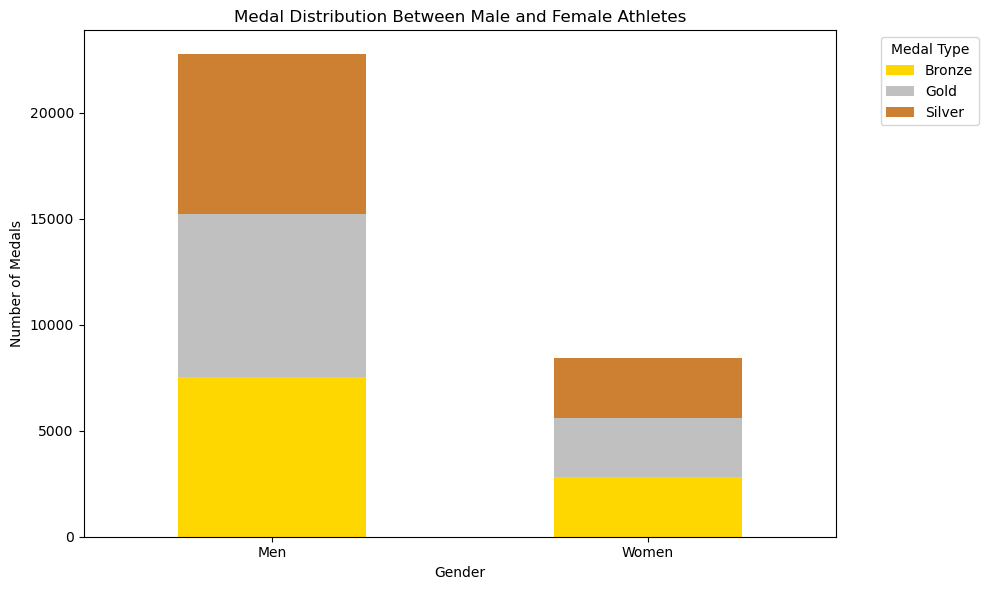

Medal distribution between male and female athletes:
Medal   Bronze  Gold  Silver
Gender                      
Men       7539  7698    7509
Women     2830  2788    2801


In [8]:
medal_gender_distribution = pd.crosstab(df['Gender'], df['Medal'])

# Step 2: Plot the distribution of medals between male and female athletes
medal_gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FFD700', '#C0C0C0', '#CD7F32'])

# Customize the plot
plt.title('Medal Distribution Between Male and Female Athletes')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the contingency table for detailed numbers
print("Medal distribution between male and female athletes:")
print(medal_gender_distribution)

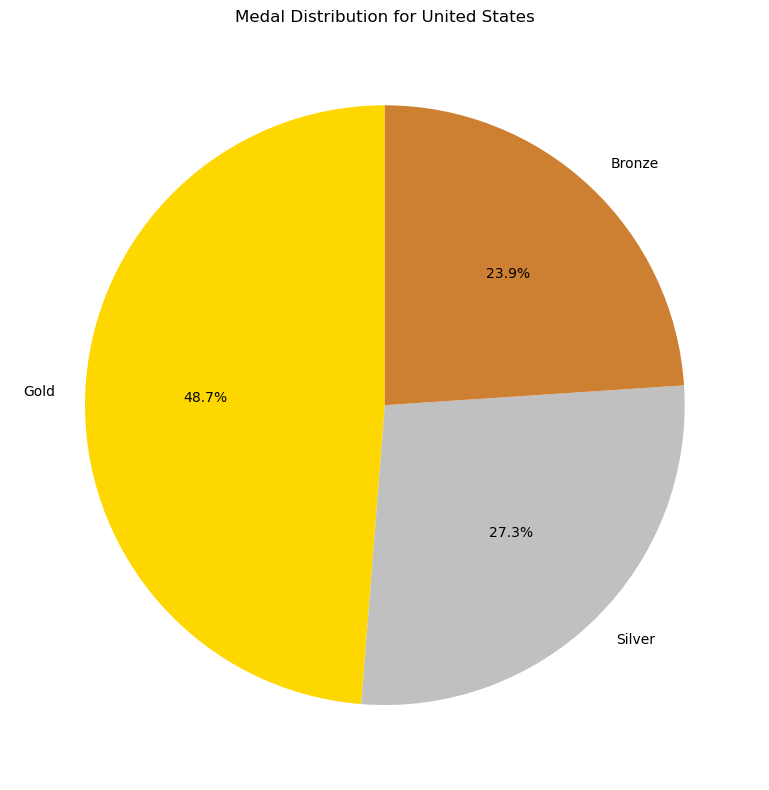

Top-performing athlete: United States
Medal
Gold      2235
Silver    1252
Bronze    1098
Name: count, dtype: int64


In [10]:
country_medal_counts = df.groupby('Country')['Medal'].count().reset_index()

# Find the top-performing country
top_country = country_medal_counts.loc[country_medal_counts['Medal'].idxmax()]

# Filter the data for the top-performing country
top_country_data = df[df['Country'] == top_country['Country']]

# Count the distribution of medals for the top country
top_country_medal_distribution = top_country_data['Medal'].value_counts()

# Create a pie chart for the medal distribution
plt.figure(figsize=(8, 8))
top_country_medal_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', '#cd7f32'])
plt.title(f"Medal Distribution for {top_country['Country']}")
plt.ylabel('')
plt.tight_layout()
plt.show()

print(f"Top-performing athlete: {top_country['Country']}")
print(top_country_medal_distribution)

Overall standard deviation of medal counts across disciplines: 725.49


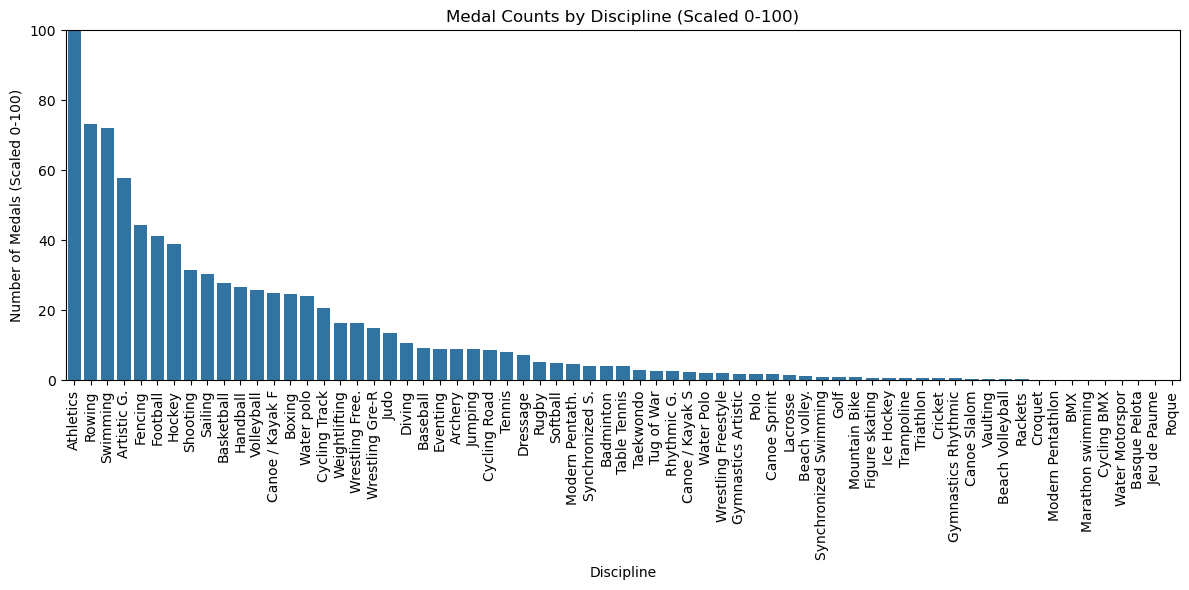


Top 5 disciplines by medal count (actual values):
Discipline
Athletics      3638
Rowing         2667
Swimming       2628
Artistic G.    2103
Fencing        1613
Name: count, dtype: int64

Bottom 5 disciplines by medal count (actual values):
Discipline
Cycling BMX        6
Water Motorspor    5
Basque Pelota      4
Jeu de Paume       3
Roque              3
Name: count, dtype: int64


In [21]:
# Step 1: Calculate overall standard deviation of medal counts across disciplines
discipline_std = df.groupby('Discipline')['Medal'].count().std()
print(f"Overall standard deviation of medal counts across disciplines: {discipline_std:.2f}")

# Step 2: Calculate medal counts for each discipline
discipline_counts = df['Discipline'].value_counts()

# Step 3: Normalize the medal counts to a scale of 0-100
scaled_discipline_counts = (discipline_counts / discipline_counts.max()) * 100

# Step 4: Create a bar plot for the normalized medal counts by discipline
plt.figure(figsize=(12, 6))
sns.barplot(x=scaled_discipline_counts.index, y=scaled_discipline_counts.values)
plt.title('Medal Counts by Discipline (Scaled 0-100)')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals (Scaled 0-100)')
plt.xticks(rotation=90)
plt.ylim(0, 100)  # Ensure y-axis is scaled from 0 to 100
plt.tight_layout()
plt.show()

# Step 5: Display top 5 and bottom 5 disciplines by medal count (non-scaled)
print("\nTop 5 disciplines by medal count (actual values):")
print(discipline_counts.head())

print("\nBottom 5 disciplines by medal count (actual values):")
print(discipline_counts.tail())

In [23]:
# Drop rows with missing athlete, discipline, or medal type information
df_cleaned_athletes = df.dropna(subset=['Athlete', 'Discipline', 'Medal'])

# Group by athlete and sport (discipline), and count the number of medals won in each sport
athlete_sport_medals = df_cleaned_athletes.groupby(['Athlete', 'Discipline']).size().reset_index(name='Medal Count')

# Sort by athlete and medal count to find athletes that consistently win medals in the same sport
consistent_athletes = athlete_sport_medals[athlete_sport_medals['Medal Count'] > 1].sort_values(by='Medal Count', ascending=False)

# Display the top athletes that consistently win medals in certain sports
print(consistent_athletes)


                     Athlete   Discipline  Medal Count
15872        PHELPS, Michael     Swimming           22
11334       LATYNINA, Larisa  Artistic G.           18
514       ANDRIANOV, Nikolay  Artistic G.           15
18305        SHAKHLIN, Boris  Artistic G.           13
15049           ONO, Takashi  Artistic G.           13
...                      ...          ...          ...
12277     LUNG, Noemi Ildiko     Swimming            2
12298            LUSIC, Deni   Water polo            2
4262      DE LA FUENTE, Juan      Sailing            2
12300        LUSK, Stanislav       Rowing            2
1      AALTONEN, Arvo Ossian     Swimming            2

[5141 rows x 3 columns]


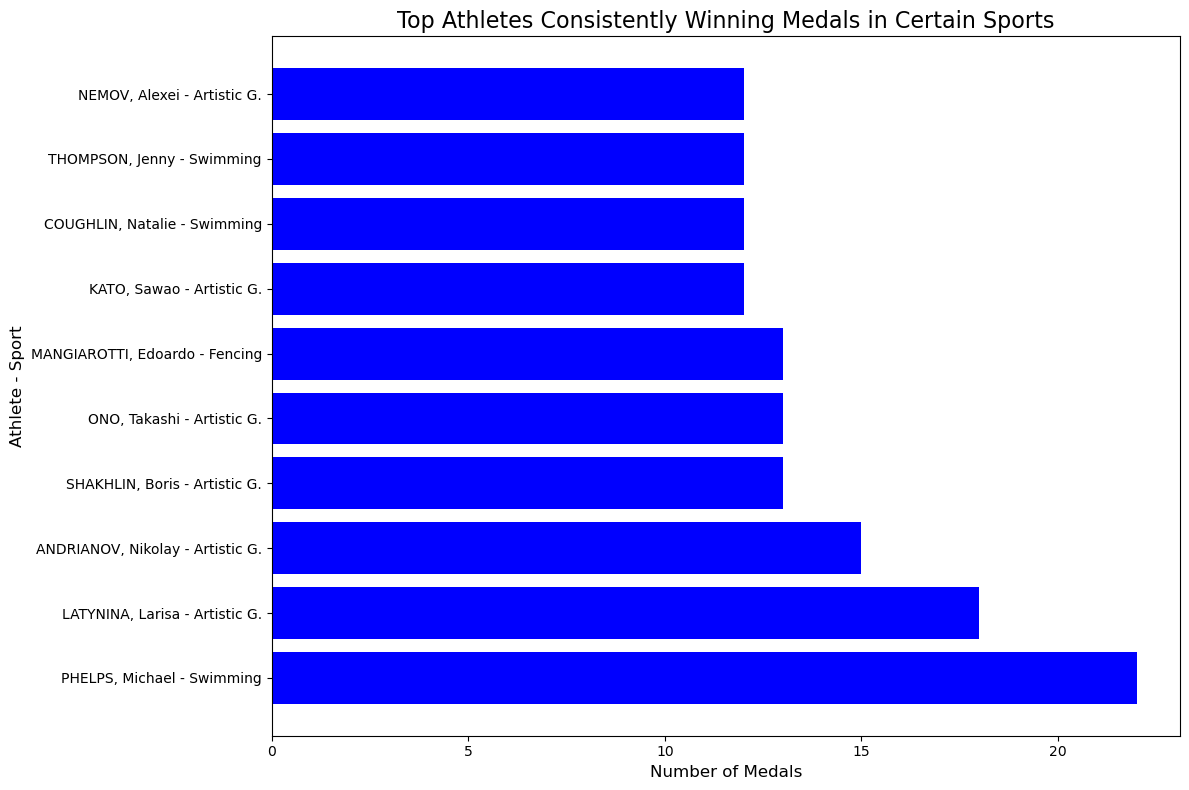

In [25]:
# Plot the consistent athletes that win medals in certain sports
plt.figure(figsize=(12, 8))
consistent_athletes_top = consistent_athletes.head(10)  # Top 10 athletes

plt.barh(consistent_athletes_top['Athlete'] + ' - ' + consistent_athletes_top['Discipline'],
         consistent_athletes_top['Medal Count'], color='blue')

plt.title('Top Athletes Consistently Winning Medals in Certain Sports', fontsize=16)
plt.xlabel('Number of Medals', fontsize=12)
plt.ylabel('Athlete - Sport', fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing country, discipline, or medal type information
df_cleaned = df.dropna(subset=['Country', 'Discipline', 'Medal'])

# Group by country and sport (discipline), and count the number of medals won in each sport
country_sport_medals = df_cleaned.groupby(['Country', 'Discipline']).size().reset_index(name='Medal Count')

# Sort by country and medal count to find countries that consistently win medals in the same sport
consistent_countries = country_sport_medals[country_sport_medals['Medal Count'] > 1].sort_values(by='Medal Count', ascending=False)

# Display the top countries that consistently win medals in certain sports
print(consistent_countries)

            Country       Discipline  Medal Count
1228  United States        Athletics          994
1263  United States         Swimming          895
1258  United States           Rowing          364
57        Australia         Swimming          354
632           Italy          Fencing          344
...             ...              ...          ...
600           India  Wrestling Free.            2
595           India           Boxing            2
593           India        Athletics            2
590         Iceland        Athletics            2
0               AFG        Taekwondo            2

[1084 rows x 3 columns]


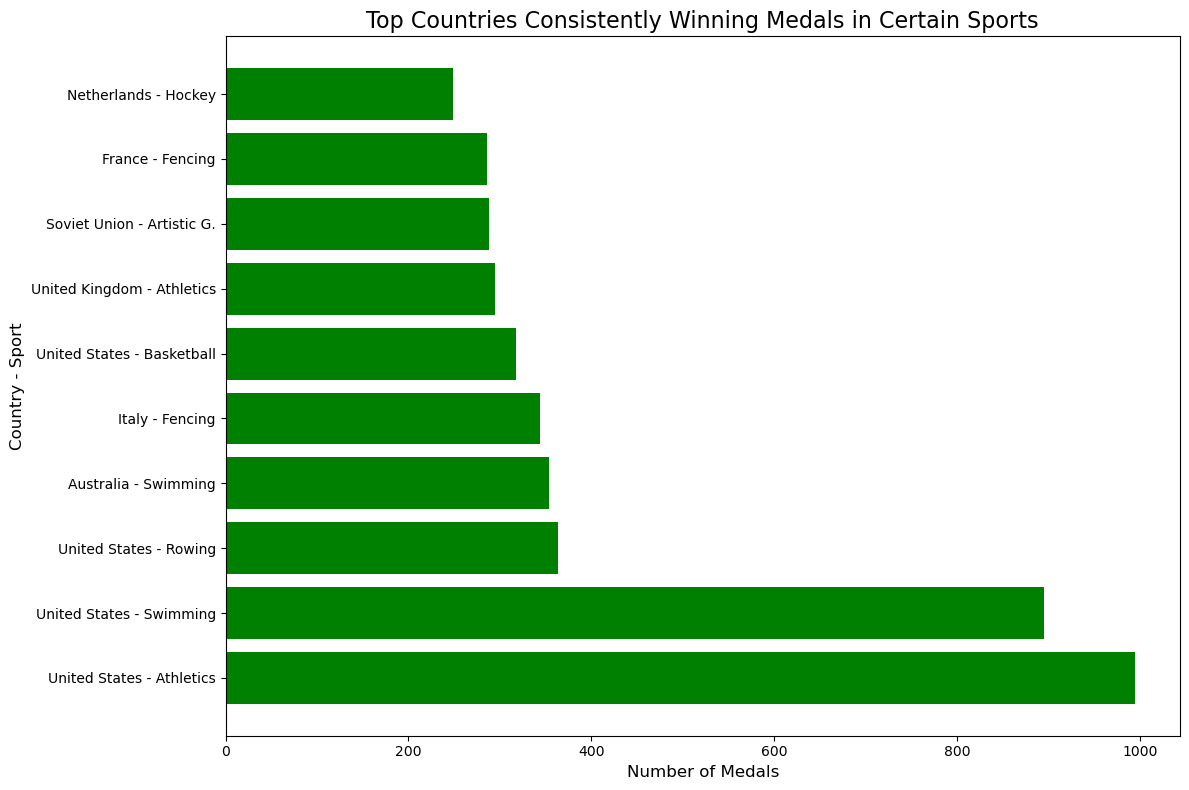

In [31]:
# Plot the consistent countries that win medals in certain sports
import matplotlib.pyplot as plt

# Plot for countries
plt.figure(figsize=(12, 8))
consistent_countries_top = consistent_countries.head(10)  # Top 10 countries

plt.barh(consistent_countries_top['Country'] + ' - ' + consistent_countries_top['Discipline'],
         consistent_countries_top['Medal Count'], color='green')

plt.title('Top Countries Consistently Winning Medals in Certain Sports', fontsize=16)
plt.xlabel('Number of Medals', fontsize=12)
plt.ylabel('Country - Sport', fontsize=12)
plt.tight_layout()
plt.show()


In [48]:
# Group the data by event and country, then count the number of occurrences
event_country_counts = df.groupby(['Event', 'Country']).size().reset_index(name='count')

# Group the data by event and gender, then count the number of occurrences
event_gender_counts = df.groupby(['Event', 'Gender']).size().reset_index(name='count')

# Find the top 3 countries for each event
top_countries_per_event = event_country_counts.groupby('Event')['count'].nlargest(3)

# Find the top 3 genders for each event
top_genders_per_event = event_gender_counts.groupby('Event')['count'].nlargest(3)

# Print the results
print("Top 3 countries per event:")
print(top_countries_per_event)
print("\nTop 3 genders per event:")
print(top_genders_per_event)

Top 3 countries per event:
Event                           
+ 100KG                     0        1
                            1        1
                            2        1
+ 100KG (Heavyweight)       7        3
                            9        3
                                    ..
Épée Team                   7197    75
                            7196    30
Épée, Amateurs And Masters  7208     2
                            7207     1
Épée, Masters               7209     3
Name: count, Length: 1872, dtype: int64

Top 3 genders per event:
Event                                  
+ 100KG                             0        4
+ 100KG (Heavyweight)               1       16
+ 100KG (Super Heavyweight)         2       24
+ 105KG                             3        9
+ 108KG, Total (Super Heavyweight)  4        3
                                          ... 
Épée Individual                     847     15
Épée Team                           848    343
                             

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming medal_data is already loaded and cleaned as in your previous code
# If not, uncomment and modify the following lines:
#medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv")
medal_data = medal_data.dropna(subset=['Sport', 'Discipline', 'Gender'])

# Group by Sport, Discipline, and Gender to count medals
sport_gender_counts = medal.groupby(['Sport', 'Discipline', 'Gender']).size().unstack(fill_value=0)

# Rename columns for clarity
sport_gender_counts.columns = ['Female', 'Male']

# Calculate total medals and gender ratios
sport_gender_counts['Total'] = sport_gender_counts['Female'] + sport_gender_counts['Male']
sport_gender_counts['Female_Ratio'] = sport_gender_counts['Female'] / sport_gender_counts['Total']
sport_gender_counts['Male_Ratio'] = sport_gender_counts['Male'] / sport_gender_counts['Total']

# Sort by total medals
sport_gender_counts_sorted = sport_gender_counts.sort_values('Total', ascending=False)

# Function to determine dominance
def get_dominance(row):
    if row['Female_Ratio'] > 0.6:
        return 'Female Dominated'
    elif row['Male_Ratio'] > 0.6:
        return 'Male Dominated'
    else:
        return 'Balanced'

sport_gender_counts_sorted['Dominance'] = sport_gender_counts_sorted.apply(get_dominance, axis=1)

# Display top 20 sports/disciplines by total medals
print(sport_gender_counts_sorted.head(20))

# Visualization
plt.figure(figsize=(15, 10))
top_n = 20  # Top N sports/disciplines to display

# Create stacked bar chart
sport_gender_counts_sorted.head(top_n).plot(kind='bar', stacked=True, y=['Female', 'Male'])

plt.title(f'Gender Distribution in Top {top_n} Olympic Sports/Disciplines')
plt.xlabel('Sport/Discipline')
plt.ylabel('Number of Medals')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print summary of gender dominance
dominance_summary = sport_gender_counts_sorted['Dominance'].value_counts()
print("\nSummary of Gender Dominance in Sports/Disciplines:")
print(dominance_summary)

# List top 5 male-dominated and female-dominated sports
print("\nTop 5 Male-Dominated Sports/Disciplines:")
print(sport_gender_counts_sorted[sport_gender_counts_sorted['Dominance'] == 'Male Dominated'].head())

print("\nTop 5 Female-Dominated Sports/Disciplines:")
print(sport_gender_counts_sorted[sport_gender_counts_sorted['Dominance'] == 'Female Dominated'].head())

NameError: name 'medal' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming medal_data is already loaded and cleaned as in your previous code
# If not, uncomment and modify the following line:
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv")

# Create a dictionary of host countries and years
host_countries = {
    1896: 'Greece', 1900: 'France', 1904: 'USA', 1908: 'UK', 1912: 'Sweden',
    1920: 'Belgium', 1924: 'France', 1928: 'Netherlands', 1932: 'USA', 1936: 'Germany',
    1948: 'UK', 1952: 'Finland', 1956: 'Australia', 1960: 'Italy', 1964: 'Japan',
    1968: 'Mexico', 1972: 'West Germany', 1976: 'Canada', 1980: 'Soviet Union',
    1984: 'USA', 1988: 'South Korea', 1992: 'Spain', 1996: 'USA', 2000: 'Australia',
    2004: 'Greece', 2008: 'China', 2012: 'UK', 2016: 'Brazil', 2020: 'Japan'
}

# Function to check if a country was the host in a given year
def is_host(row):
    return host_countries.get(row['Year']) == row['Country']

# Add a column to indicate if the country was the host
medal_data['Is_Host'] = medal_data.apply(is_host, axis=1)

# Group by Country, Year, and Is_Host to count medals
medal_counts = medal_data.groupby(['Country', 'Year', 'Is_Host']).size().reset_index(name='Medal_Count')

# Calculate average medals for each country when hosting and not hosting
host_performance = medal_counts.groupby(['Country', 'Is_Host'])['Medal_Count'].mean().unstack()
host_performance.columns = ['Avg_Medals_Non_Host', 'Avg_Medals_Host']
host_performance = host_performance.dropna()  # Remove countries that never hosted

# Calculate the difference in performance
host_performance['Difference'] = host_performance['Avg_Medals_Host'] - host_performance['Avg_Medals_Non_Host']
host_performance = host_performance.sort_values('Difference', ascending=False)

# Print the results
print(host_performance)

# Visualization


# Statistical test
from scipy import stats

host_medals = host_performance['Avg_Medals_Host']
non_host_medals = host_performance['Avg_Medals_Non_Host']

t_statistic, p_value = stats.ttest_rel(host_medals, non_host_medals)

print(f"\nt-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is statistically significant evidence of a home advantage.")
else:
    print("There is no statistically significant evidence of a home advantage.")

              Avg_Medals_Non_Host  Avg_Medals_Host  Difference
Country                                                       
Brazil                  23.944444            485.0  461.055556
Soviet Union           200.875000            442.0  241.125000
Belgium                 13.791667            188.0  174.208333
Sweden                  41.400000            173.0  131.600000
Germany                101.300000            210.0  108.700000
France                  59.960000            153.5   93.540000
Australia               56.200000            122.0   65.800000
China                  128.375000            184.0   55.625000
South Korea             44.333333             77.0   32.666667
Greece                   9.294118             41.5   32.205882
Spain                   38.277778             66.0   27.722222
Italy                   60.800000             88.0   27.200000
Netherlands             43.125000             65.0   21.875000
Finland                 19.583333             40.0   20

NameError: name 'max_val' is not defined

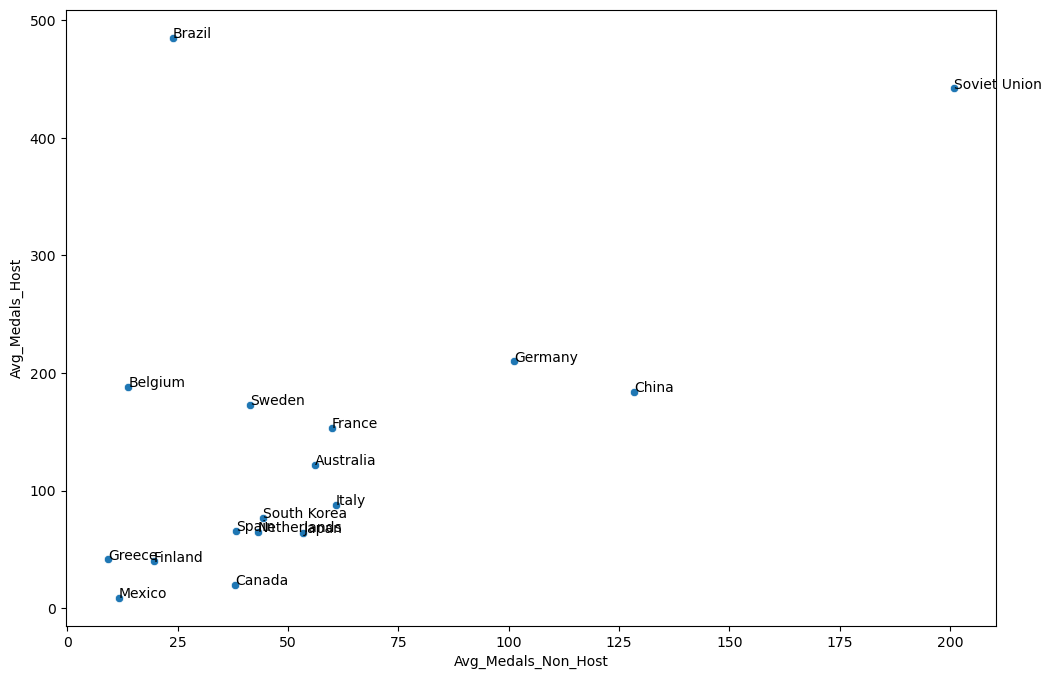

In [3]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=host_performance.reset_index(), x='Avg_Medals_Non_Host', y='Avg_Medals_Host')

# Add labels for each point
for idx, row in host_performance.iterrows():
    plt.annotate(idx, (row['Avg_Medals_Non_Host'], row['Avg_Medals_Host']))

# Add a diagonal line for reference


#max_val = max(host_performance['Avg_Medals_Non_Host'].max(), host_performance['Avg_Medals_Host'].max())
plt.plot([0, max_val], [0, max_val], 'r--')

plt.title('Average Medal Count: Host vs Non-Host Years')
plt.xlabel('Average Medals in Non-Host Years')
plt.ylabel('Average Medals in Host Years')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv")

# Filter out rows where the medal is NaN (no medal awarded)
medals_df = df[df['Medal'].notna()]

# Count the medals by country
medal_counts = medals_df.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

# Rename the columns for better readability
medal_counts.columns = ['Bronze', 'Gold', 'Silver']

# Display the result
print(medal_counts)

            Bronze  Gold  Silver
Country                         
AFG              2     0       0
AHO              0     0       1
ARM              8     1       2
AZE             15     6       5
Algeria          8     5       2
...            ...   ...     ...
VEN              8     2       2
Vietnam          0     0       2
Yugoslavia     118   143     174
Zambia           1     0       1
Zimbabwe         1    18       4

[140 rows x 3 columns]


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv")

# Filter out rows where the medal is NaN (no medal awarded)
medals_df = df[df['Medal'].notna()]

# Count the medals by country
medal_counts = medals_df.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

# Rename the columns for better readability
medal_counts.columns = ['Bronze', 'Gold', 'Silver']

# Calculate total medals for each country
medal_counts['Total'] = medal_counts.sum(axis=1)

# Sort the countries by total medals and get the top 20
top_20_countries = medal_counts.sort_values(by='Total', ascending=False).head(20)

# Display the result
print(top_20_countries)

                            Bronze  Gold  Silver  Total
Country                                                
United States                 1098  2235    1252   4585
Soviet Union                   584   838     627   2049
Germany                        655   595     545   1795
United Kingdom                 553   546     621   1720
France                         497   408     491   1396
Italy                          404   476     416   1296
Australia                      477   332     409   1218
Hungary                        351   412     316   1079
Sweden                         328   349     367   1044
Russia                         337   270     284    891
Netherlands                    339   233     279    851
German Democratic Republic     225   329     271    825
China                          221   290     296    807
Japan                          303   213     272    788
Canada                         262   155     232    649
Romania                        288   157     195

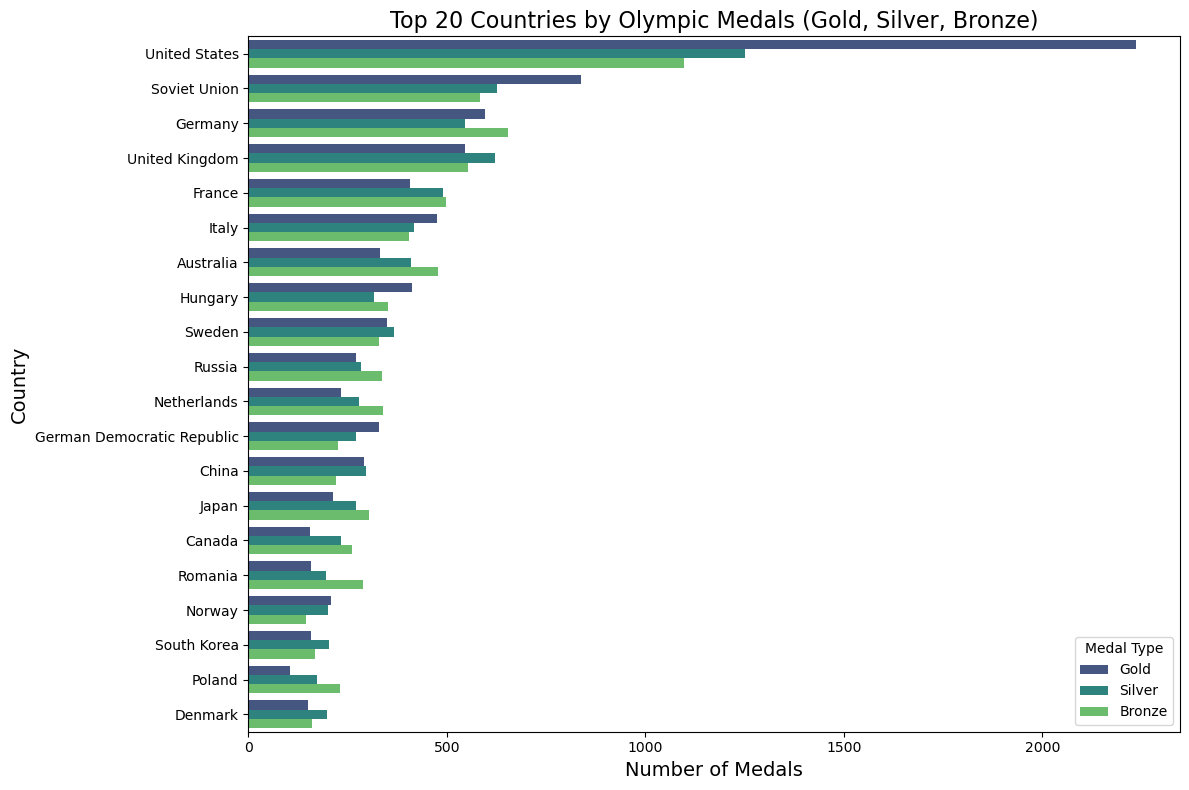

In [15]:


# Reset index for plotting
top_20_countries.reset_index(inplace=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Melt the DataFrame for better plotting
top_20_melted = top_20_countries.melt(id_vars='Country', value_vars=['Gold', 'Silver', 'Bronze'], 
                                        var_name='Medal Type', value_name='Count')

# Create a bar plot
sns.barplot(data=top_20_melted, x='Count', y='Country', hue='Medal Type', palette='viridis')

# Add titles and labels
plt.title('Top 20 Countries by Olympic Medals (Gold, Silver, Bronze)', fontsize=16)
plt.xlabel('Number of Medals', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.legend(title='Medal Type')

# Show the plot
plt.tight_layout()
plt.show()

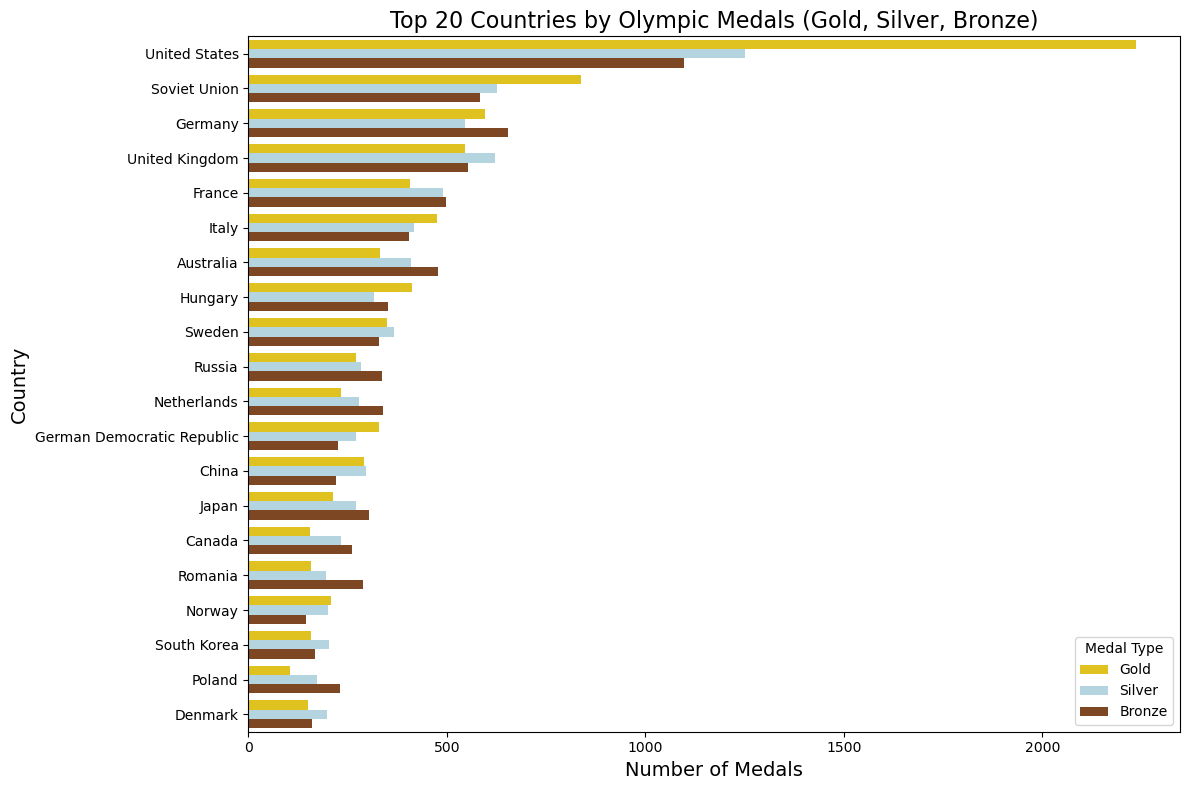

In [19]:

# Reset index for plotting
top_20_countries.reset_index(inplace=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Melt the DataFrame for better plotting
top_20_melted = top_20_countries.melt(id_vars='Country', value_vars=['Gold', 'Silver', 'Bronze'], 
                                        var_name='Medal Type', value_name='Count')

# Create a bar plot with specific colors for each medal type
sns.barplot(data=top_20_melted, x='Count', y='Country', hue='Medal Type',
            hue_order=['Gold', 'Silver', 'Bronze'],
            palette={'Gold': '#FFD700', 'Silver': '#ADD8E6', 'Bronze': '#8B4513'})

# Add titles and labels
plt.title('Top 20 Countries by Olympic Medals (Gold, Silver, Bronze)', fontsize=16)
plt.xlabel('Number of Medals', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.legend(title='Medal Type')

# Show the plot
plt.tight_layout()
plt.show()